In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# Output is a zip object in memory
coordinates = zip(lats, lngs)
coordinates

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vestmanna
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | new scone
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | teya
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | deep river
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | linxi
Processing Record 14 of Set 1 | vangazi
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | sibu
Processing Record 17 of Set 1 | udimskiy
Processing Record 18 of Set 1 | pangnirtung
Processing Record 19 of Set 1 | kudahuvadhoo
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | san patricio
Processing Record 23 of Set 1

In [12]:
len(city_data)

561

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vestmanna,62.1564,-7.1664,50.92,93,90,8.05,FO,2021-07-08 19:15:23
1,Mar Del Plata,-38.0023,-57.5575,59.09,31,90,7.00,AR,2021-07-08 19:11:27
2,Mount Gambier,-37.8333,140.7667,37.60,89,100,5.08,AU,2021-07-08 19:15:23
3,New Scone,56.4194,-3.4051,65.88,85,99,1.01,GB,2021-07-08 19:15:23
4,Busselton,-33.6500,115.3333,55.04,76,33,16.75,AU,2021-07-08 19:15:24
5,Teya,60.3778,92.6267,54.30,73,99,2.35,RU,2021-07-08 19:15:24
6,Longyearbyen,78.2186,15.6401,42.64,87,75,18.41,SJ,2021-07-08 19:15:24
7,Deep River,46.1001,-77.4995,58.75,98,100,6.82,CA,2021-07-08 19:15:09
8,Tuktoyaktuk,69.4541,-133.0374,54.39,60,5,9.78,CA,2021-07-08 19:15:24
9,Hobart,-42.8794,147.3294,34.05,88,84,6.91,AU,2021-07-08 19:11:12


In [14]:
new_column_order = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp','Wind Speed']
city_data_df=city_data_df[new_column_order].copy()
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vestmanna,90,FO,2021-07-08 19:15:23,93,62.1564,-7.1664,50.92,8.05
1,Mar Del Plata,90,AR,2021-07-08 19:11:27,31,-38.0023,-57.5575,59.09,7.00
2,Mount Gambier,100,AU,2021-07-08 19:15:23,89,-37.8333,140.7667,37.60,5.08
3,New Scone,99,GB,2021-07-08 19:15:23,85,56.4194,-3.4051,65.88,1.01
4,Busselton,33,AU,2021-07-08 19:15:24,76,-33.6500,115.3333,55.04,16.75


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

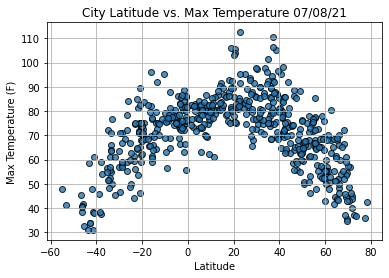

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

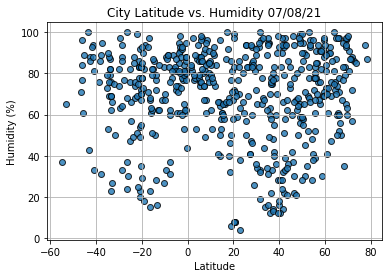

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

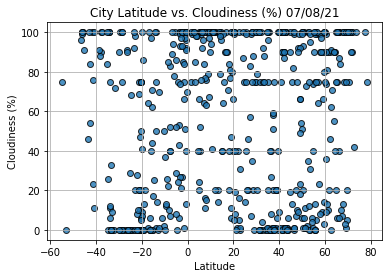

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

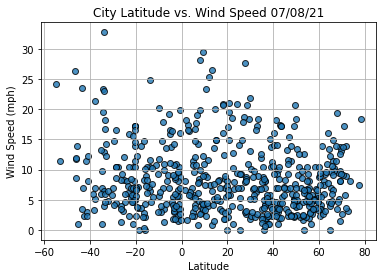

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create northern and southern hemisphere dataframes
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]

In [39]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

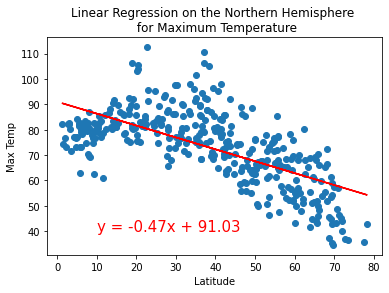

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


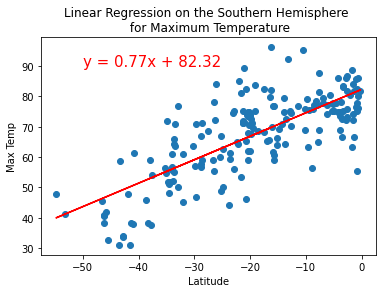

In [47]:
# Linear regression on the Southern Hemiphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))
